# 2023-09-05 · Inhibitory impulse response (PSP)

We've had excitatory (https://tfiers.github.io/phd/nb/2023-07-26__AdEx_Nto1_we_I_syn.html#impulse-response), \
but inh is interesting too: same syn strength, same PSP? Or no.

In [1]:
include("lib/Nto1.jl")

using Revise … ✔ (0.3 s)
using Units, Nto1AdEx, ConnectionTests, ConnTestEval … ✔ (0.2 s)
using StatsBase … ✔ (0.2 s)


In [2]:
N = 1
EI_ratio = 0  # i.e. all inh
duration = 150 * ms
wₑ = 14 * pS
wᵢ = 4 * wₑ
input = [[10*ms]]

@time sim = Nto1AdEx.sim(N, duration; input, EI_ratio, record_all=true, wᵢ);

  1.228889 seconds (1.74 M allocations: 113.680 MiB, 3.69% gc time, 99.91% compilation time)


In [3]:
include("lib/plot.jl")

import PythonCall … ✔ (2.4 s)
import PythonPlot … ✔ (6.1 s)
using Sciplotlib … ✔ (0.7 s)
using PhDPlots … ✔


In [4]:
(; Eₑ, Eᵢ) = Nto1AdEx
(; gₑ, gᵢ, V, w) = sim.rec

Iₛ = @. gₑ*(V - Eₑ) + gᵢ*(V - Eᵢ);

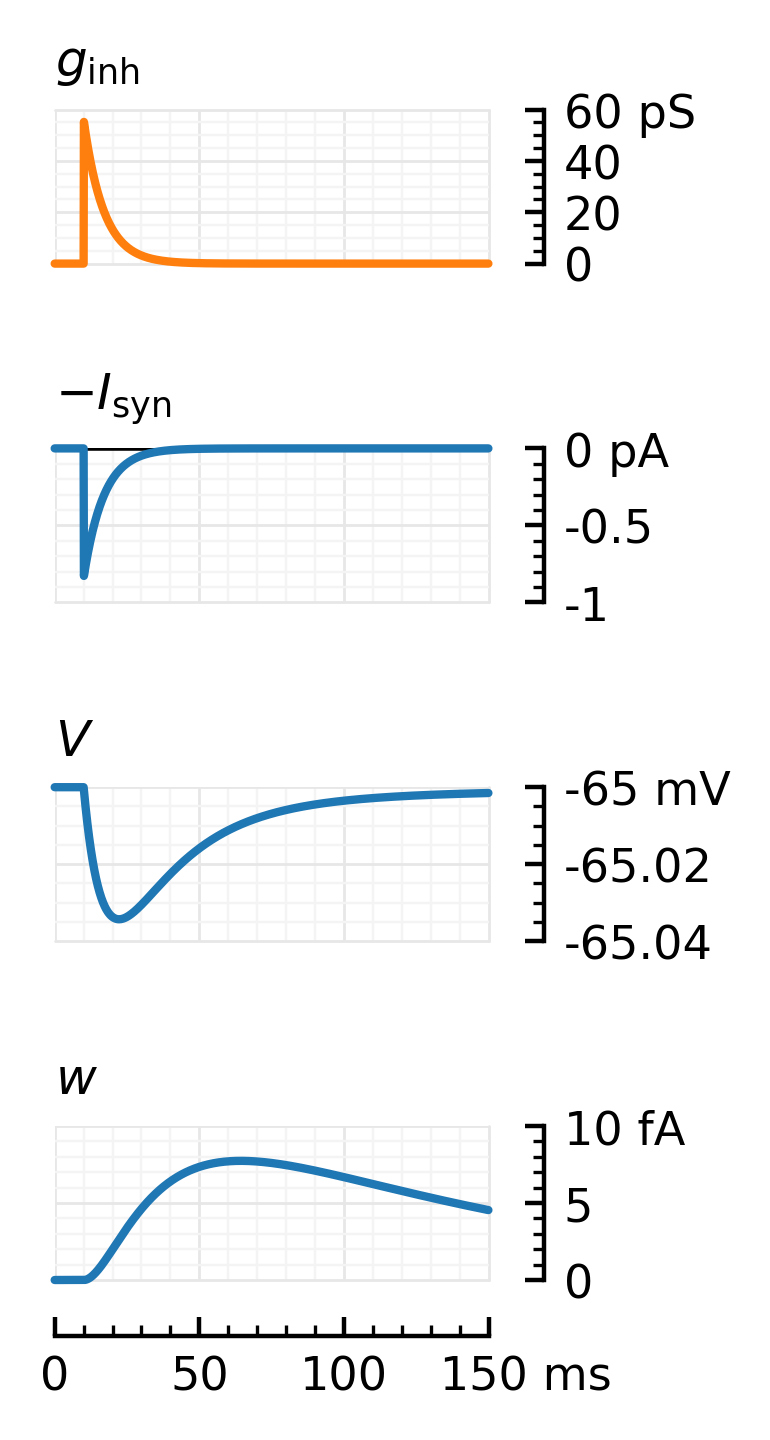

In [27]:
kw = (nbins_y=3, nbins_x=3, yaxloc=:right, clip_on=false, xunit=:ms, xlim=[0,duration]/ms)
figsize = (mw, 2.7*mw)
figsize = (1.4, 3.8)
fig, axs = plt.subplots(; figsize, nrows=4, sharex=true, dpi=400)
axs[1].axhline(c="black", lw=1)
plotsig(gᵢ, ms; hylabel=L"$g_\mathrm{inh}$", kw..., ax=axs[0], color=color_inh, yunit=:pS, ylim=[0, 60])
plotsig(-Iₛ, ms; hylabel=L"$-I_\mathrm{syn}$", kw..., ax=axs[1], yunit=:pA)
plotsig(V, ms; hylabel=L"$V$", kw..., ax=axs[2], yunit=:mV, ylim=[-65.04, -65])
plotsig(w, ms; hylabel=L"$w$", kw..., ax=axs[3], yunit=:fA, ylim=[0, 10])
axs[-1].set_xlabel(nothing)
for ax in axs[0:2]
    ax.set_xlabel(nothing)
    ax.spines["bottom"].set_visible(false)
    ax.tick_params(bottom=false, which="both")
end
plt.subplots_adjust(hspace=1.2);

In [30]:
savefig_phd("impulse_response_inh", fig)

Saved at `../thesis/figs/impulse_response_inh.pdf`

Just to check our code Nto1AdEx.jl haven't impacted original sim:

In [7]:
@time simm = Nto1AdEx.sim(6500, 10*minutes);

  1.787063 seconds (22.91 k allocations: 912.320 MiB, 1.87% gc time, 0.43% compilation time)


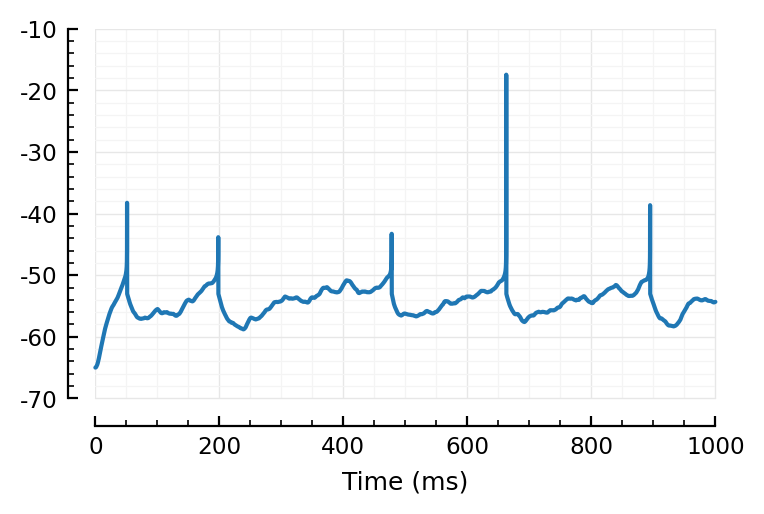

In [10]:
plotsig(simm.V / mV, [0, 1000], ms);

In [11]:
simm.spiketimes[1] / ms

51.2

All good.